In [22]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("C:/Users/PMLS/Downloads/archive_onlineRetail/online_retail_2010_2011.csv", encoding='ISO-8859-1')  # use ISO if you get encoding errors

# Preview the structure
df.info()
df.head()
# import pandas as pd

# # Load Excel file and select the "Year 2010-2011" sheet
# df = pd.read_excel("C:/Users/PMLS/Downloads/archive_onlineRetail/online_retail_II.xlsx", sheet_name="Year 2010-2011")
# # Remove duplicate rows
# df_cleaned = df.drop_duplicates()



# # Drop rows with missing Customer ID or Description
# df_cleaned = df_cleaned.dropna(subset=["Customer ID", "Description"])

# # Remove canceled orders (Invoice starting with "C")
# df_cleaned = df_cleaned[~df_cleaned["Invoice"].astype(str).str.startswith("C")]

# # Remove rows with Quantity or Price <= 0
# df_cleaned = df_cleaned[(df_cleaned["Quantity"] > 0) & (df_cleaned["Price"] > 0)]

# # Add a new column: TotalAmount = Quantity * Price
# df_cleaned["TotalAmount"] = df_cleaned["Quantity"] * df_cleaned["Price"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [25]:
# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with missing CustomerID or Description
df = df.dropna(subset=["Customer ID", "Description"])

# Remove canceled orders (Invoice starts with "C")
df = df[~df["Invoice"].astype(str).str.startswith("C")]

# Remove rows with non-positive Quantity or UnitPrice
df = df[(df["Quantity"] > 0) & (df["Price"] > 0)]

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors='coerce')

# Create a new column: TotalAmount = Quantity × UnitPrice
df["TotalAmount"] = df["Quantity"] * df["Price"]

# Preview cleaned dataset
print("✅ Cleaned Data Shape:", df.shape)
df.head()
# # Check shape and preview
# print("Cleaned dataset shape:", df_cleaned.shape)


✅ Cleaned Data Shape: (392693, 9)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
# General Overview Analysis
overview = {
    "✅ Unique Products": df["StockCode"].nunique(),
    "🧾 Total Transactions (Invoices)": df["Invoice"].nunique(),
    "👤 Unique Customers": df["Customer ID"].nunique(),
    "🌍 Countries Involved": df["Country"].nunique(),
    "📃 List of Countries": df["Country"].unique().tolist()
}

# Display results
for k, v in overview.items():
    print(f"{k}: {v}")


✅ Unique Products: 3665
🧾 Total Transactions (Invoices): 18532
👤 Unique Customers: 4338
🌍 Countries Involved: 37
📃 List of Countries: ['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal', 'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland', 'Austria', 'Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA']


🔝 Top 10 Selling Products (by Quantity):

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\416473998.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_quantity.values, y=top_quantity.index, palette="Blues_r")


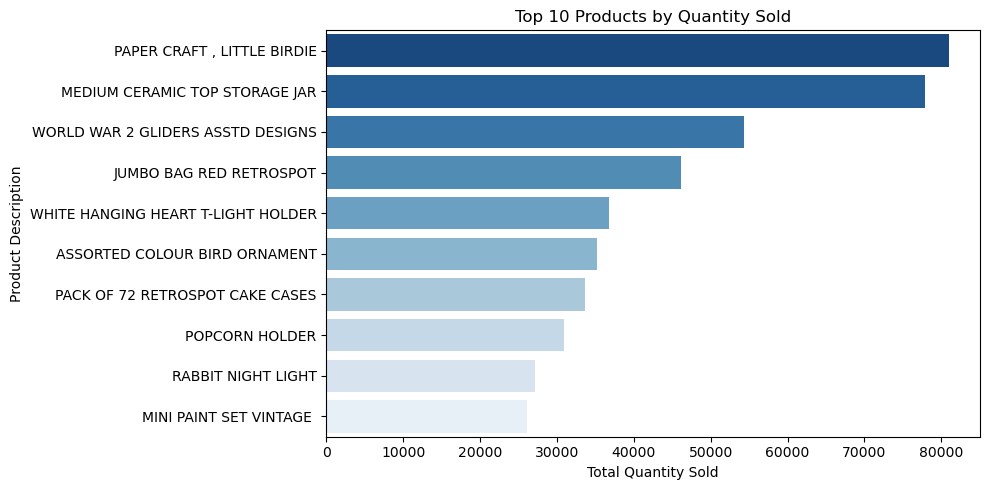


💰 Top 10 Products by Revenue:

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77821.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalAmount, dtype: float64


C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\416473998.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue.values, y=top_revenue.index, palette="Greens_r")


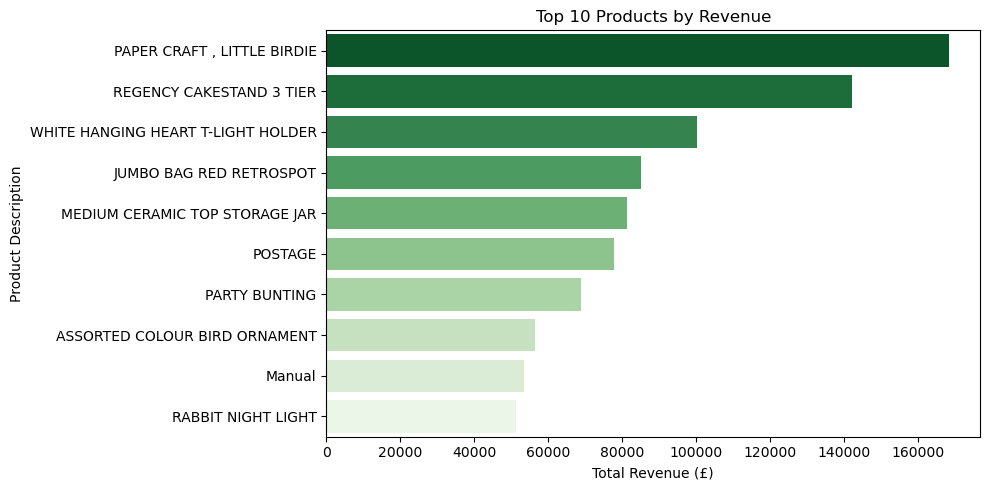


⚠️ Products with Zero or Negative Price (if any):
✅ None found


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Top 10 Selling Products by Quantity
top_quantity = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print("🔝 Top 10 Selling Products (by Quantity):\n")
print(top_quantity)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_quantity.values, y=top_quantity.index, palette="Blues_r")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

# 2️⃣ Top 10 Revenue-Generating Products
top_revenue = df.groupby("Description")["TotalAmount"].sum().sort_values(ascending=False).head(10)
print("\n💰 Top 10 Products by Revenue:\n")
print(top_revenue)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette="Greens_r")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue (£)")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

# 3️⃣ Products with Zero or Negative Price (check for data errors)
zero_price_products = df[df["Price"] <= 0]["Description"].unique()
print("\n⚠️ Products with Zero or Negative Price (if any):")
print(zero_price_products if len(zero_price_products) > 0 else "✅ None found")


🔝 Top 10 Customers by Quantity Purchased:

Customer ID
14646.0    196915
16446.0     80997
14911.0     80240
12415.0     77374
12346.0     74215
17450.0     69973
17511.0     64549
18102.0     64124
13694.0     63312
14298.0     58343
Name: Quantity, dtype: int64


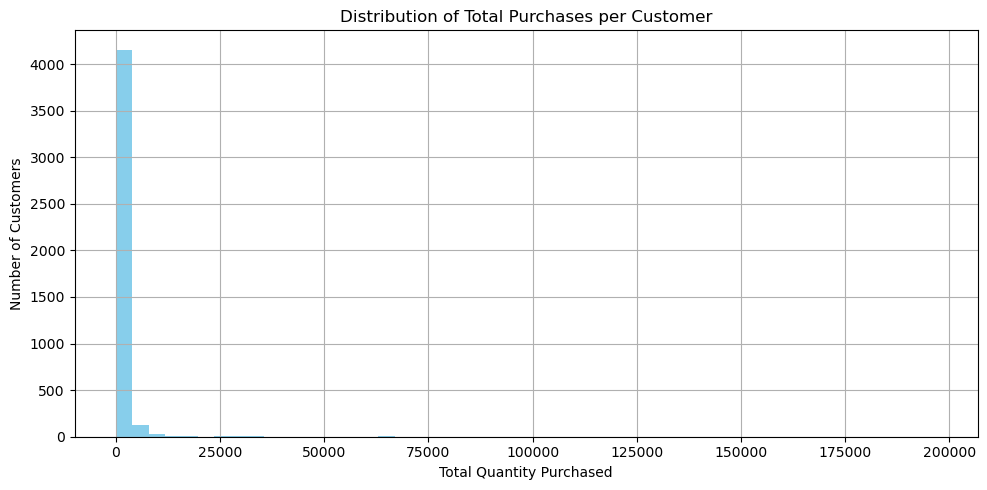


💎 Top 10 Loyal Customers (by # of Invoices):

Customer ID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: Invoice, dtype: int64


In [28]:
# 1️⃣ Customers who bought the most products (by total quantity)
top_customers_qty = df.groupby("Customer ID")["Quantity"].sum().sort_values(ascending=False).head(10)
print("🔝 Top 10 Customers by Quantity Purchased:\n")
print(top_customers_qty)

# 2️⃣ Distribution of purchases per customer
customer_purchase_distribution = df.groupby("Customer ID")["Quantity"].sum()

# Plot histogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(customer_purchase_distribution, bins=50, color='skyblue')
plt.title("Distribution of Total Purchases per Customer")
plt.xlabel("Total Quantity Purchased")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3️⃣ Most loyal customers (by number of orders/invoices)
loyal_customers = df.groupby("Customer ID")["Invoice"].nunique().sort_values(ascending=False).head(10)
print("\n💎 Top 10 Loyal Customers (by # of Invoices):\n")
print(loyal_customers)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\3048334469.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PMLS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\PMLS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


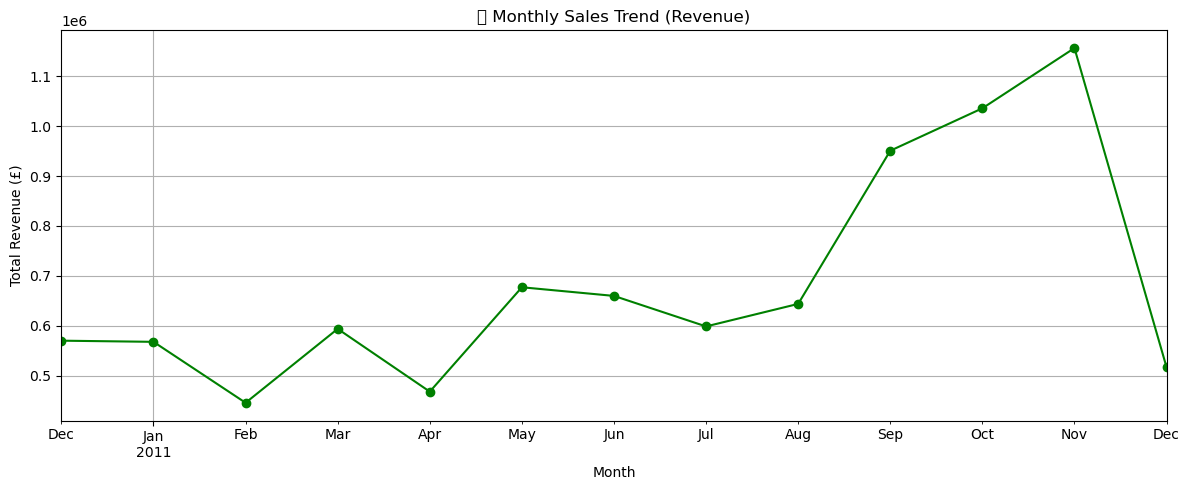

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\3048334469.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_orders.index, y=weekday_orders.values, palette="Purples_r")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\3048334469.py:30: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PMLS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


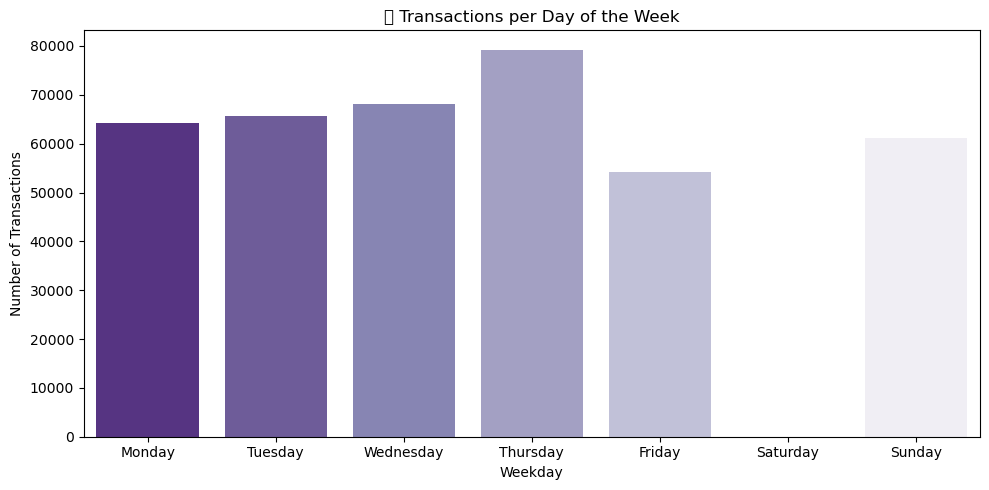

🌟 Peak Sales Month: November 2011
🐌 Slowest Sales Month: February 2011


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract month and weekday from InvoiceDate
df["Month"] = df["InvoiceDate"].dt.to_period("M")
df["Weekday"] = df["InvoiceDate"].dt.day_name()

# 1️⃣ Monthly Sales Trend (Revenue)
monthly_sales = df.groupby("Month")["TotalAmount"].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("📅 Monthly Sales Trend (Revenue)")
plt.ylabel("Total Revenue (£)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Weekly Transaction Patterns
weekday_orders = df.groupby("Weekday")["Invoice"].count().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_orders.index, y=weekday_orders.values, palette="Purples_r")
plt.title("📆 Transactions per Day of the Week")
plt.xlabel("Weekday")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

# 3️⃣ Peak & Slow Months
peak_month = monthly_sales.idxmax().strftime('%B %Y')
slow_month = monthly_sales.idxmin().strftime('%B %Y')

print(f"🌟 Peak Sales Month: {peak_month}")
print(f"🐌 Slowest Sales Month: {slow_month}")


C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\4723231.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_orders.values, y=country_orders.index, palette="coolwarm")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\4723231.py:12: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PMLS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


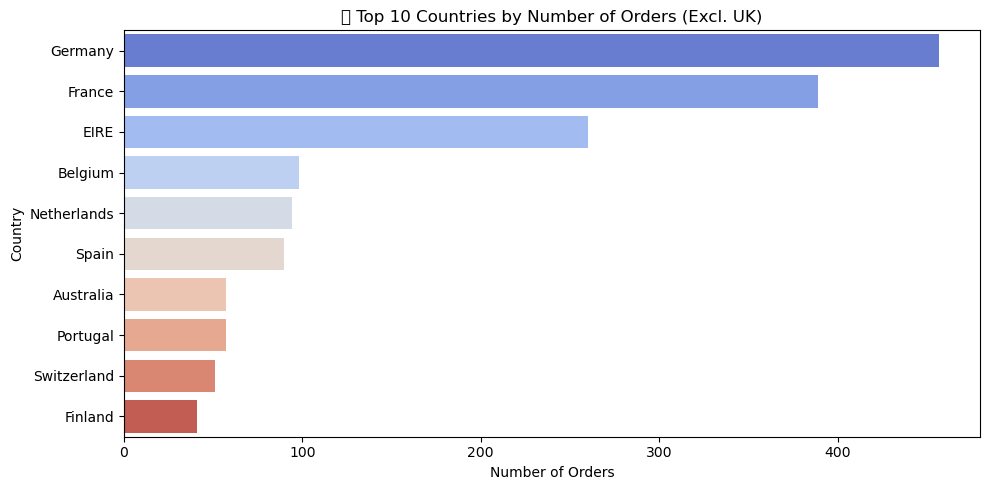

C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\4723231.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="viridis")
C:\Users\PMLS\AppData\Local\Temp\ipykernel_13068\4723231.py:23: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\PMLS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


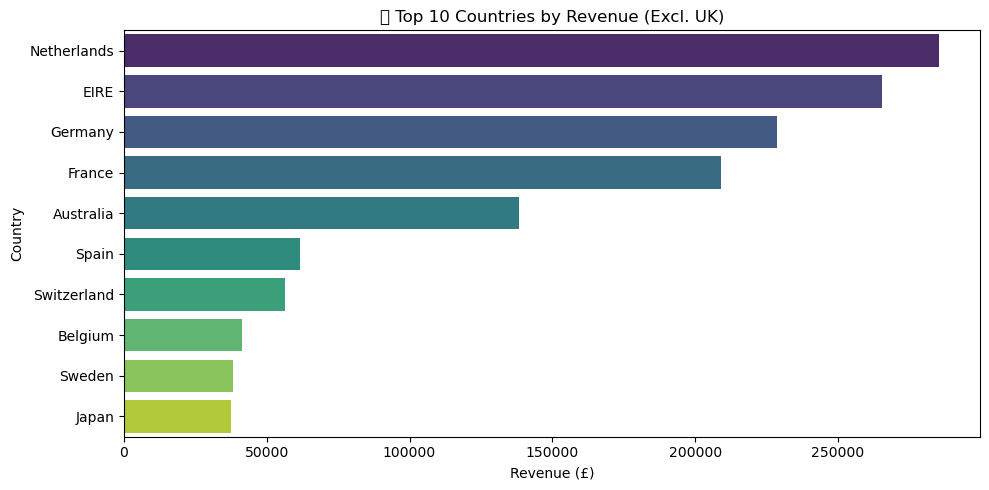

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Number of orders by country (excluding United Kingdom for better scale)
country_orders = df[df["Country"] != "United Kingdom"].groupby("Country")["Invoice"].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=country_orders.values, y=country_orders.index, palette="coolwarm")
plt.title("🌍 Top 10 Countries by Number of Orders (Excl. UK)")
plt.xlabel("Number of Orders")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# 2️⃣ Revenue by country (excluding UK)
country_revenue = df[df["Country"] != "United Kingdom"].groupby("Country")["TotalAmount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="viridis")
plt.title("💰 Top 10 Countries by Revenue (Excl. UK)")
plt.xlabel("Revenue (£)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [31]:
import datetime as dt

# Set a reference date (day after last transaction)
latest_date = df["InvoiceDate"].max() + dt.timedelta(days=1)

# Group by Customer for RFM
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
    "Invoice": "nunique",                                   # Frequency
    "TotalAmount": "sum"                                    # Monetary
})

# Rename columns
rfm.columns = ["Recency", "Frequency", "Monetary"]

# Display top 10
print("🧮 Sample RFM Table:")
print(rfm.head(10))


🧮 Sample RFM Table:
             Recency  Frequency  Monetary
Customer ID                              
12346.0          326          1  77183.60
12347.0            2          7   4310.00
12348.0           75          4   1797.24
12349.0           19          1   1757.55
12350.0          310          1    334.40
12352.0           36          8   2506.04
12353.0          204          1     89.00
12354.0          232          1   1079.40
12355.0          214          1    459.40
12356.0           23          3   2811.43


In [32]:
# Step 1: Score each RFM metric (1 = worst, 5 = best)
r_labels = [5, 4, 3, 2, 1]  # Lower recency is better
f_labels = m_labels = [1, 2, 3, 4, 5]  # Higher freq/monetary is better

rfm["R_Score"] = pd.qcut(rfm["Recency"], q=5, labels=r_labels)
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), q=5, labels=f_labels)
rfm["M_Score"] = pd.qcut(rfm["Monetary"], q=5, labels=m_labels)

# Step 2: Create combined RFM Segment
rfm["RFM_Segment"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)
rfm["RFM_Score"] = rfm[["R_Score", "F_Score", "M_Score"]].astype(int).sum(axis=1)

# Step 3: Define customer segments
def segment_customer(rfm_score):
    if rfm_score >= 12:
        return "🎖️ Champions"
    elif rfm_score >= 9:
        return "💎 Loyal"
    elif rfm_score >= 6:
        return "🙂 Potential"
    else:
        return "⚠️ At Risk"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)

# View result
print("🎯 RFM Segmentation Summary:\n")
print(rfm["Segment"].value_counts())

# Optional: show top champions
print("\n🏆 Top Champion Customers:")
rfm[rfm["Segment"] == "🎖️ Champions"].sort_values("RFM_Score", ascending=False).head()


🎯 RFM Segmentation Summary:

Segment
🎖️ Champions    1254
🙂 Potential     1178
💎 Loyal         1025
⚠️ At Risk       881
Name: count, dtype: int64

🏆 Top Champion Customers:


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Segment
Customer ID,,,,,,,,,
18272.0,3,6,3078.58,5,5,5,555,15,🎖️ Champions
12362.0,3,10,5226.23,5,5,5,555,15,🎖️ Champions
18210.0,2,6,2621.38,5,5,5,555,15,🎖️ Champions
12347.0,2,7,4310.00,5,5,5,555,15,🎖️ Champions
18229.0,12,20,7276.90,5,5,5,555,15,🎖️ Champions


In [33]:
# Export cleaned transactional data
df.to_csv("Cleaned_Online_Retail.csv", index=False)

# Optional: Export RFM table
rfm.to_csv("RFM_Segmentation.csv")
